This code block imports essential libraries for data analysis, visualization, and machine learning model evaluation, setting up the environment for data exploration, model building, and result analysis.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
import os

**Data Loading**

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
val= pd.read_csv('Dig-MNIST.csv')

In [5]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Renaming Column 'id' to 'label' in Test DataFrame**

In [6]:
test.rename(columns={'id':'label'}, inplace=True)
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Displaying Shapes of DataFrames**

In [8]:
print('Train Shape: ', train.shape)
print('Test Shape:',test.shape)
print('Submission Shape: ',submission.shape)
print('Validation Shape: ',val.shape)

Train Shape:  (8990, 785)
Test Shape: (5000, 785)
Submission Shape:  (5000, 2)
Validation Shape:  (8754, 785)


**Grouping and Counting Data by Label**

In [9]:
train.groupby(by='label').size()

label
0    899
1    899
2    899
3    899
4    899
5    899
6    899
7    899
8    899
9    899
dtype: int64

**Splitting Data into Training and Testing Sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size=0.2)

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1493,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3245,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2819,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8685,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2860,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3456,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8509,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualizing First 10 Images of Each Class in Training Set**

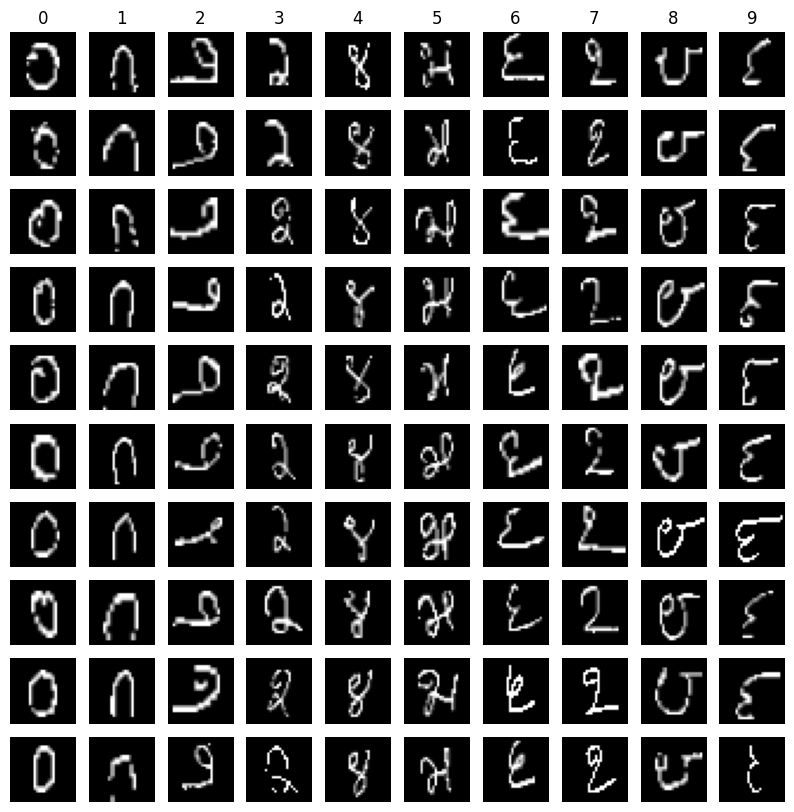

In [13]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

for i in range(10):
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10):
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

**Training XGBoost Classifier and Making Predictions**

In [14]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.39537
[1]	validation_0-mlogloss:1.07423
[2]	validation_0-mlogloss:0.85763
[3]	validation_0-mlogloss:0.70716
[4]	validation_0-mlogloss:0.59256
[5]	validation_0-mlogloss:0.50429
[6]	validation_0-mlogloss:0.43570
[7]	validation_0-mlogloss:0.37979
[8]	validation_0-mlogloss:0.33631
[9]	validation_0-mlogloss:0.30087
[10]	validation_0-mlogloss:0.27243
[11]	validation_0-mlogloss:0.24869
[12]	validation_0-mlogloss:0.22826
[13]	validation_0-mlogloss:0.21183
[14]	validation_0-mlogloss:0.19726
[15]	validation_0-mlogloss:0.18446
[16]	validation_0-mlogloss:0.17402
[17]	validation_0-mlogloss:0.16477
[18]	validation_0-mlogloss:0.15726
[19]	validation_0-mlogloss:0.15098
[20]	validation_0-mlogloss:0.14500
[21]	validation_0-mlogloss:0.13993
[22]	validation_0-mlogloss:0.13486
[23]	validation_0-mlogloss:0.13082
[24]	validation_0-mlogloss:0.12778
[25]	validation_0-mlogloss:0.12574
[26]	validation_0-mlogloss:0.12263
[27]	validation_0-mlogloss:0.11943
[28]	validation_0-mlogloss:0.1

**Evaluating XGBoost Model Accuracy**

In [15]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy XGBOOST: 97.39%


**Making Predictions on Test Data with Trained XGBoost Model**

In [16]:
test_x = test.values[:,1:]
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]

**Creating Submission File with Predictions**

In [17]:
submission['label'] = predictions
submission.to_csv('submission.csv', index=False)

**Displaying the First Few Rows of the Submission DataFrame**

In [18]:
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
